# **Object Detection - Models Testing - RF-DETR**

---

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import torch
%matplotlib inline

In [2]:
rfdetr = torch.load("../rfdetr.pth", map_location=torch.device('cpu'), weights_only=False)
rfdetr.model.device = torch.device('cpu')

In [3]:
test_image_path = "../../data/split_data/images/test/frame_0_aug_0.jpg"
frame = cv2.imread(test_image_path)
test_image = Image.fromarray(frame)
test_result = rfdetr.predict(test_image, threshold=0.5)
test_result

Detections(xyxy=array([[396.66342, 292.40128, 421.87613, 327.90918],
       [381.94092, 373.8653 , 407.06375, 410.0116 ],
       [536.4527 , 357.20184, 561.9491 , 391.68344],
       [463.22424, 432.14752, 487.83624, 467.2406 ],
       [443.7034 , 233.83397, 468.003  , 262.08737],
       [572.0691 , 291.6256 , 599.80475, 318.82303],
       [560.55646, 444.8495 , 587.51575, 470.62125],
       [327.80734, 318.64966, 354.5221 , 342.33435],
       [501.4242 , 285.5318 , 528.35126, 320.3033 ]], dtype=float32), mask=None, confidence=array([0.95334387, 0.9496921 , 0.9479536 , 0.94762033, 0.94558513,
       0.94342035, 0.9409558 , 0.935391  , 0.70599484], dtype=float32), class_id=array([0, 0, 1, 3, 3, 0, 0, 1, 4]), tracker_id=None, data={}, metadata={})

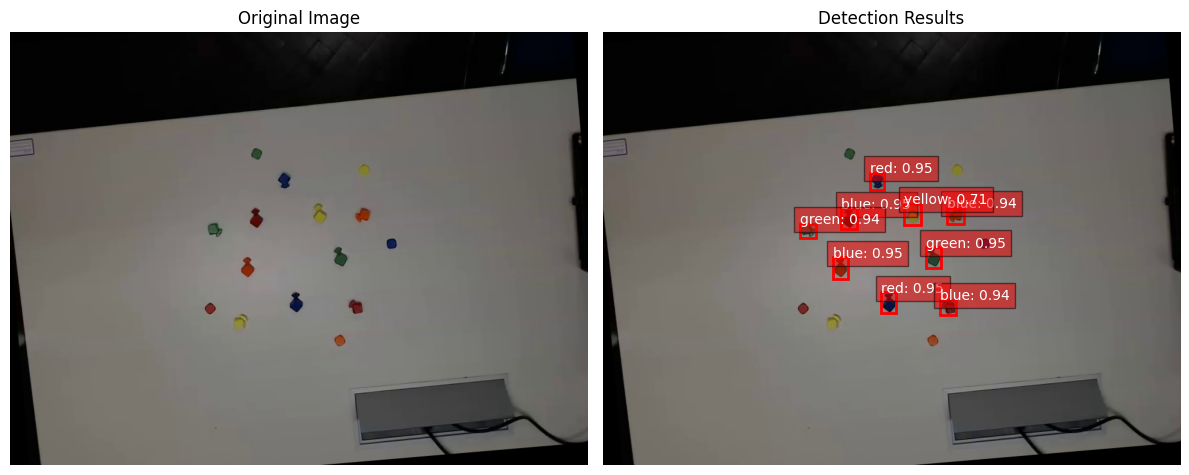

In [8]:
img = mpimg.imread(test_image_path)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show original image
axs[0].imshow(img)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Show image with detection results
axs[1].imshow(img)
for box, cls, conf in zip(
    test_result.xyxy,
    test_result.class_id,
    test_result.confidence,
):
    x1, y1, x2, y2 = box
    axs[1].add_patch(
        plt.Rectangle(
            (x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor="red", linewidth=2
        )
    )
    label = f"{['blue', 'green', 'orange', 'red', 'yellow'][int(cls)]}: {conf:.2f}"
    axs[1].text(
        x1, y1, label, color="white", fontsize=10, bbox=dict(facecolor="red", alpha=0.5)
    )
axs[1].set_title("Detection Results")
axs[1].axis("off")

plt.tight_layout()
plt.show()